## Transfer Learning VGG 16 

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\train'
valid_path = r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\train\*')

In [8]:
folders

['C:\\Users\\yatharth bansal\\Desktop\\Dogs vs Cats Data\\train\\Cat',
 'C:\\Users\\yatharth bansal\\Desktop\\Dogs vs Cats Data\\train\\Dog']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/3
250/250 [==============================] - 1348s 5s/step - loss: 0.1839 - accuracy: 0.9304 - val_loss: 0.2333 - val_accuracy: 0.9080
Epoch 2/3
250/250 [==============================] - 1167s 5s/step - loss: 0.1772 - accuracy: 0.9277 - val_loss: 0.2077 - val_accuracy: 0.9295
Epoch 3/3
250/250 [==============================] - 1188s 5s/step - loss: 0.1646 - accuracy: 0.9339 - val_loss: 0.2239 - val_accuracy: 0.9275


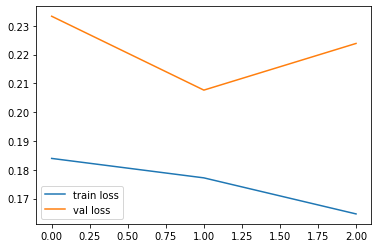

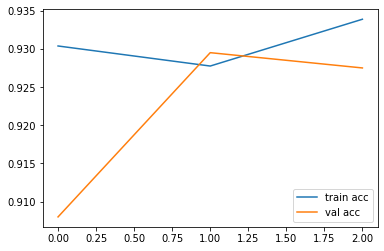

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('dog_cat_classification_model.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[8.2352617e-15, 1.0000000e+00],
       [9.8793823e-01, 1.2061801e-02],
       [2.4060146e-05, 9.9997592e-01],
       ...,
       [5.4494055e-16, 1.0000000e+00],
       [8.6267968e-04, 9.9913728e-01],
       [9.2126441e-01, 7.8735612e-02]], dtype=float32)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
m=load_model('dog_cat_classification_model.h5')

In [15]:
img=image.load_img(r'C:\Users\yatharth bansal\Desktop\Dogs vs Cats Data\test\Dog\dog.11517.jpg',target_size=(224,224))



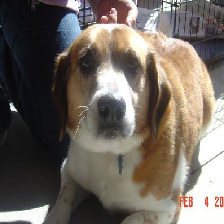

In [16]:
img

In [17]:
test_image= image.img_to_array(img)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=m.predict(test_image)

In [18]:
result

array([[0.00105872, 0.99894124]], dtype=float32)

In [19]:
a=np.argmax(model.predict(test_image), axis=1)
a

array([1], dtype=int64)

In [20]:
if a==0:
    print("The image is a cat")
else:
    print("The image is a dog")

The image is a dog
